In [44]:
import matplotlib.pyplot as plt
import numpy as np
import librosa 
import librosa.display
from scipy.fft import fft, fftfreq

In [75]:
sr = 16000
N_FFT = 1024
T = 1/sr

freq = fftfreq(N_FFT, T)[0:N_FFT//2]

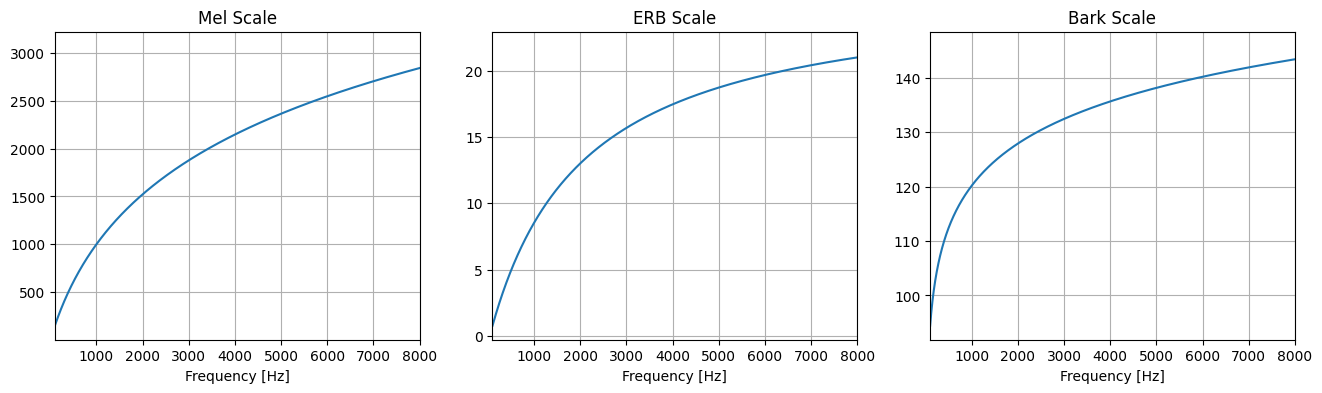

In [84]:
f = np.linspace(100, 10000, 8000)
bark = 26.81*f / (1960 + f) - 0.53
erb = 11.17 * np.log(np.abs(f+0.312/(f+14.675))) + 43
mel = 2595 * np.log10(1+f/700)

plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.plot(f, mel)
plt.xlim([100, 8000])
plt.xlabel('Frequency [Hz]')
plt.title('Mel Scale')
plt.grid()

plt.subplot(1,3,2)
plt.plot(f, bark)
plt.xlim([100, 8000])
plt.xlabel('Frequency [Hz]')
plt.title('ERB Scale')
plt.grid()

plt.subplot(1,3,3)
plt.plot(f, erb)
plt.xlim([100, 8000])
plt.xlabel('Frequency [Hz]')
plt.title('Bark Scale')
plt.grid()

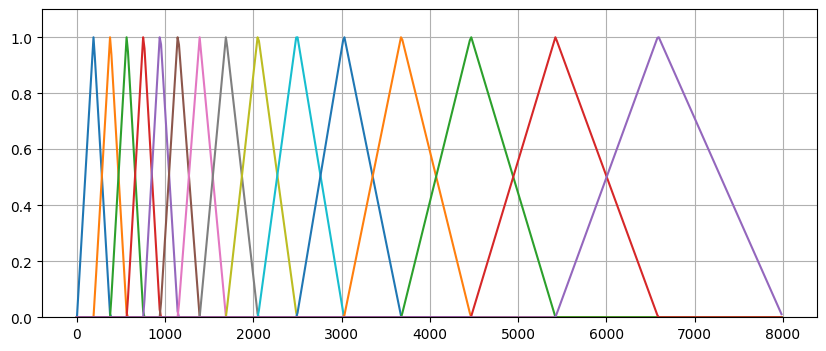

In [81]:
melfb = librosa.filters.mel(sr = sr, 
                            n_fft = N_FFT, 
                            n_mels = 15)

melfb = np.array([melfb[h,:(freq.shape[0] - melfb.shape[-1])]/np.max(melfb[h]) for h in range(melfb.shape[0])])
plt.figure(figsize=(10,4))
plt.plot(freq, melfb.T)
plt.ylim([0, 1.1])
plt.grid()
